In [1]:
import pandas as pd

VISA = '/kaggle/input/visa-stock-data-2024/visa_stocks.csv'

df = pd.read_csv(filepath_or_buffer=VISA, parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-03-19,14.875000,17.250000,13.7500,14.1250,12.579995,708486000
1,2008-03-20,14.600000,16.250000,14.3750,16.0875,14.327834,198985200
2,2008-03-24,16.809999,16.924999,14.7500,14.9325,13.299167,149566400
3,2008-03-25,15.145000,16.062500,14.9550,15.8125,14.082910,87092000
4,2008-03-26,15.682500,16.120001,15.3925,15.9900,14.240999,43111600


<Axes: xlabel='Date', ylabel='Adj Close'>

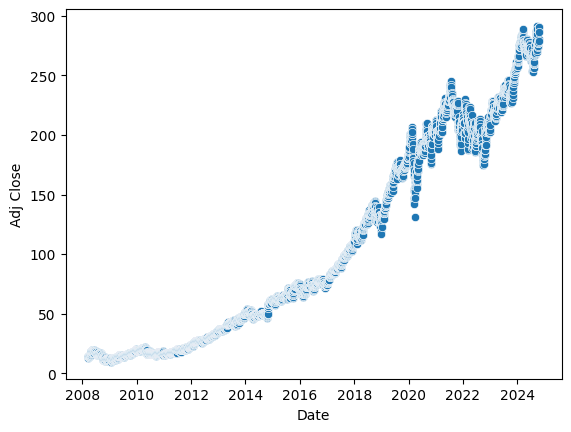

In [2]:
from seaborn import scatterplot

scatterplot(data=df, x='Date', y='Adj Close')